In [ ]:
# pip3 install neo4j-driver
# python3 example.py

from neo4j import GraphDatabase, basic_auth
from dotenv import load_dotenv
import os

# .env 파일에서 환경 변수 로드
load_dotenv()


# .env 파일에서 불러온 환경 변수 사용
uri = os.getenv("NEO4J_URI_server")
user = os.getenv("NEO4J_USER_server")
password = os.getenv("NEO4J_PASSWORD_server")

# Neo4j 드라이버 설정
driver = GraphDatabase.driver(uri, auth=basic_auth(user, password))

# Cypher 쿼리 예시
cypher_query = '''
MATCH (a:Airport{iata:$iata})-[r:HAS_ROUTE]->(other)  
  RETURN other.iata as destination
'''

# 예시로 사용할 파라미터
params = {"iata": "JFK"}

# 쿼리 실행
with driver.session() as session:
    results = session.run(cypher_query, params)
    for record in results:
        print(record["destination"])

# 드라이버 닫기
driver.close()



In [ ]:


chain = GraphCypherQAChain.from_llm(
    ChatOpenAI(temperature=0), graph=graph, verbose=True
)

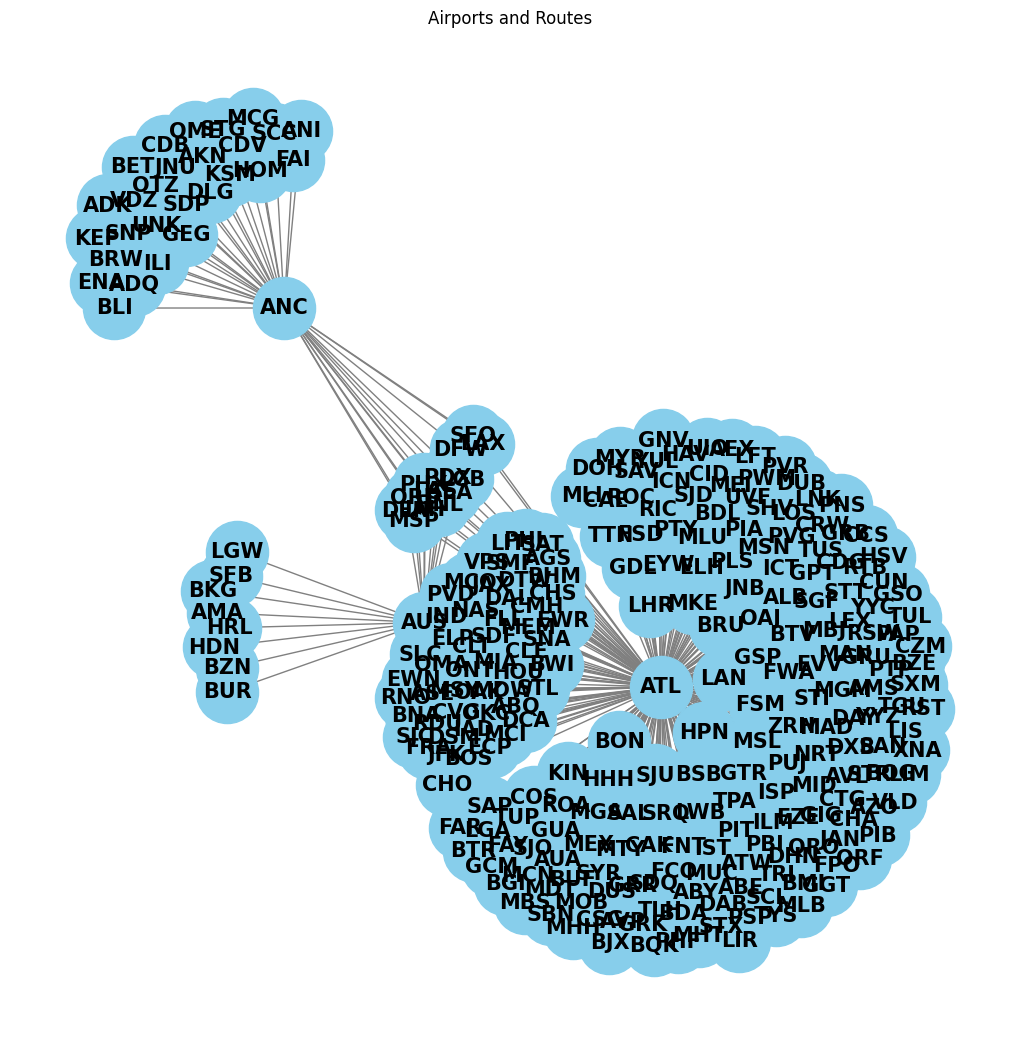

In [89]:
from neo4j import GraphDatabase, basic_auth
import os
import networkx as nx
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# Neo4j 드라이버 설정
driver = GraphDatabase.driver(uri, auth=basic_auth(user, password))

# Cypher 쿼리 예시
cypher_query = '''
MATCH (a:Airport)-[r:HAS_ROUTE]->(b:Airport)
RETURN a.iata AS source, b.iata AS destination limit 350
'''

# 쿼리 실행 및 그래프 생성
G = nx.Graph()

with driver.session() as session:
    results = session.run(cypher_query)
    for record in results:
        source = record["source"]
        destination = record["destination"]
        G.add_edge(source, destination)

# 드라이버 닫기
driver.close()

# 그래프 시각화
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', font_size=15, font_weight='bold')
plt.title("Airports and Routes")
plt.show()

In [95]:
from neo4j import GraphDatabase, basic_auth

# Neo4j 드라이버 설정


def print_sample_results(query, limit=5):
    with driver.session(database="neo4j") as session:
        results = session.run(query)
        count = 0

        
        for record in results:
            print(record)
            count += 1
            if count >= limit:
                break

#  노드와 그 속성 확인
print("Sample Nodes and Properties:")
print_sample_results("MATCH (n) RETURN n LIMIT 10", limit=3)

#  관계와 그 속성 확인
print("\nSample Relationships and Properties:")
print_sample_results("MATCH ()-[r]->() RETURN r LIMIT 5", limit=5)

# 모든 노드의 라벨 확인
print("\nSample Node Labels:")
print_sample_results("MATCH (n) RETURN DISTINCT labels(n) AS labels LIMIT 5", limit=5)

# 모든 관계의 타입 확인
print("\nSample Relationship Types:")
print_sample_results("MATCH ()-[r]->() RETURN DISTINCT type(r) AS type LIMIT 5", limit=5)

# 드라이버 닫기
# driver.close()

Sample Nodes and Properties:
<Record n=<Node element_id='4:4e77168f-ba7a-4b40-ba46-55d1dc757a42:0' labels=frozenset({'Database'}) properties={'name': 'Neo4j'}>>
<Record n=<Node element_id='4:4e77168f-ba7a-4b40-ba46-55d1dc757a42:1' labels=frozenset({'Message'}) properties={'name': 'Hello World!'}>>
<Record n=<Node element_id='4:4e77168f-ba7a-4b40-ba46-55d1dc757a42:8627' labels=frozenset({'Airport'}) properties={'descr': 'Hartsfield - Jackson Atlanta International Airport', 'altitude': 1026, 'longest': 12390, 'iata': 'ATL', 'city': 'Atlanta', 'icao': 'KATL', 'location': POINT(-84.4281005859375 33.6366996765137), 'id': '1', 'pagerank': 10.389948350302957, 'runways': 5}>>

Sample Relationships and Properties:


/var/folders/jr/r6q5x5h966554q8401g1rk2m0000gn/T/ipykernel_22860/2265781548.py:7: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


<Record r=<Relationship element_id='5:4e77168f-ba7a-4b40-ba46-55d1dc757a42:0' nodes=(<Node element_id='4:4e77168f-ba7a-4b40-ba46-55d1dc757a42:0' labels=frozenset() properties={}>, <Node element_id='4:4e77168f-ba7a-4b40-ba46-55d1dc757a42:1' labels=frozenset() properties={}>) type='SAYS' properties={}>>
<Record r=<Relationship element_id='5:4e77168f-ba7a-4b40-ba46-55d1dc757a42:26034' nodes=(<Node element_id='4:4e77168f-ba7a-4b40-ba46-55d1dc757a42:8627' labels=frozenset() properties={}>, <Node element_id='4:4e77168f-ba7a-4b40-ba46-55d1dc757a42:12130' labels=frozenset() properties={}>) type='IN_CITY' properties={}>>
<Record r=<Relationship element_id='5:4e77168f-ba7a-4b40-ba46-55d1dc757a42:26035' nodes=(<Node element_id='4:4e77168f-ba7a-4b40-ba46-55d1dc757a42:8628' labels=frozenset() properties={}>, <Node element_id='4:4e77168f-ba7a-4b40-ba46-55d1dc757a42:12131' labels=frozenset() properties={}>) type='IN_CITY' properties={}>>
<Record r=<Relationship element_id='5:4e77168f-ba7a-4b40-ba46-5

In [91]:

print("\nUnique Relationship Property Types:")
print_sample_results("MATCH ()-[r]->() UNWIND keys(r) AS 속성_키 RETURN DISTINCT 속성_키 AS 유니크_속성_타입", limit=50)



Unique Relationship Property Types:


/var/folders/jr/r6q5x5h966554q8401g1rk2m0000gn/T/ipykernel_22860/2917212855.py:7: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


<Record 유니크_속성_타입='distance'>


In [92]:
from dotenv import load_dotenv

load_dotenv()


True

In [93]:
# CYPHER_GENERATION_TEMPLATE = """Task:Generate Cypher statement to query a graph database.
# Instructions:
# Use only the provided relationship types and properties in the schema.
# Do not use any other relationship types or properties that are not provided.
# Schema:
# {schema}
# Note: Do not include any explanations or apologies in your responses.
# Do not respond to any questions that might ask anything else than for you to construct a Cypher statement.
# Do not include any text except the generated Cypher statement.

# The question is:
# {question}"""
# CYPHER_GENERATION_PROMPT = PromptTemplate(
#     input_variables=["schema", "question"], template=CYPHER_GENERATION_TEMPLATE
# )

In [9]:
# CYPHER_QA_TEMPLATE = """You are an assistant that helps to form nice and human understandable answers.
# The information part contains the provided information that you must use to construct an answer.
# The provided information is authoritative, you must never doubt it or try to use your internal knowledge to correct it.
# Make the answer sound as a response to the question. Do not mention that you based the result on the given information.
# Here is an example:

# Question: Which managers own Neo4j stocks?
# Context:[manager:CTL LLC, manager:JANE STREET GROUP LLC]
# Helpful Answer: CTL LLC, JANE STREET GROUP LLC owns Neo4j stocks.

# Follow this example when generating answers.
# If the provided information is empty, say that you don't know the answer.
# Information:
# {context}

# Question: {question}
# Helpful Answer:"""
# CYPHER_QA_PROMPT = PromptTemplate(
#     input_variables=["context", "question"], template=CYPHER_QA_TEMPLATE
# )

In [96]:
chain.run("which country can i go from icn airport. tell me  code ")




> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (a:Airport {iata: 'ICN'})-[:HAS_ROUTE]->(b:Airport)-[:IN_COUNTRY]->(c:Country)
RETURN c.code
Full Context:
[{'c.code': 'RU'}, {'c.code': 'JP'}, {'c.code': 'TH'}, {'c.code': 'UZ'}, {'c.code': 'MY'}, {'c.code': 'PH'}, {'c.code': 'AU'}, {'c.code': 'MP'}, {'c.code': 'CN'}, {'c.code': 'TR'}]

> Finished chain.


'You can go to RU, JP, TH, UZ, MY, PH, AU, MP, CN, TR from ICN airport.'

In [15]:
chain.run("Which airport has the most direct routes? Provide the airport code. ")




> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (a1:Airport)-[r:HAS_ROUTE]->(a2:Airport)
WITH a1, COUNT(r) AS numRoutes
RETURN a1.id AS airportCode
ORDER BY numRoutes DESC
LIMIT 1
Full Context:
[{'airportCode': '52'}]

> Finished chain.


'Airport with code 52 has the most direct routes.'

In [23]:
chain.run("What are the top 5 busiest city name by the number of flights? ")




> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (a1:Airport)-[:HAS_ROUTE]->(a2:Airport)
WITH a1, count(a2) as num_flights
MATCH (a1)-[:IN_CITY]->(c:City)
RETURN c.name AS city_name, num_flights
ORDER BY num_flights DESC
LIMIT 5
Full Context:
[{'city_name': 'Frankfurt', 'num_flights': 307}, {'city_name': 'Istanbul', 'num_flights': 307}, {'city_name': 'Paris', 'num_flights': 293}, {'city_name': 'Amsterdam', 'num_flights': 282}, {'city_name': 'Munich', 'num_flights': 270}]

> Finished chain.


'Frankfurt, Istanbul, Paris, Amsterdam, Munich'

In [41]:
chain.run("Which Country has the most airport")




> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (a:Airport)-[:IN_COUNTRY]->(c:Country)
RETURN c.code, COUNT(a) AS numAirports
ORDER BY numAirports DESC
LIMIT 1
Full Context:
[{'c.code': 'US', 'numAirports': 586}]

> Finished chain.


'The US has the most airports with a total of 586.'

In [94]:
chain.run("i want to see  graph top 20 important way airway from Incheon airport(iata : icn)")




> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (a1:Airport {iata: 'ICN'})-[:HAS_ROUTE]->(a2:Airport)
RETURN a1, a2
ORDER BY a2.pagerank DESC
LIMIT 20
Full Context:
[{'a1': {'altitude': 23, 'descr': 'Seoul, Incheon International Airport', 'longest': 13000, 'iata': 'ICN', 'city': 'Seoul', 'icao': 'RKSI', 'location': POINT(126.450996398926 37.4691009521484), 'id': '122', 'pagerank': 4.339780868740824, 'runways': 3}, 'a2': {'descr': 'Dallas/Fort Worth International Airport', 'altitude': 607, 'longest': 13401, 'iata': 'DFW', 'city': 'Dallas', 'icao': 'KDFW', 'location': POINT(-97.0380020141602 32.896800994873), 'id': '8', 'pagerank': 11.97978260670334, 'runways': 7}}, {'a1': {'altitude': 23, 'descr': 'Seoul, Incheon International Airport', 'longest': 13000, 'iata': 'ICN', 'city': 'Seoul', 'icao': 'RKSI', 'location': POINT(126.450996398926 37.4691009521484), 'id': '122', 'pagerank': 4.339780868740824, 'runways': 3}, 'a2': {'altitude': 672, 'descr': "Chicago O'Hare Inter

'I want to see the graph of the top 20 important airways from Incheon Airport (IATA: ICN).'